In [1]:
#import

from bs4 import BeautifulSoup
import requests
import pandas as pd
#!pip install yahoo_fin
from yahoo_fin.stock_info import get_data
#!pip install kaggle
import kaggle
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
#Using Yahoo Finance API to get Netflix stock status
netflixStock = get_data("NFLX", start_date = None, end_date = None, index_as_date = True, interval = "1d")

#Creating the dataframe
netflixStockDF = pd.DataFrame(columns = ['close'])
netflixStockDF = netflixStockDF.append(netflixStock.iloc[:,3:4])
netflixStockDF=netflixStockDF.rename_axis('Date').reset_index()
netflixStockDF.rename(columns = {'close':'Netflix Stock'}, inplace = True)

#Saving the dataframe
netflixStockDF.to_csv('data/netflixStockDF.csv')
netflixStockDF

,Date,Netflix Stock
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5065,2022-07-07,189.270004
5066,2022-07-08,186.979996
5067,2022-07-11,177.339996
5068,2022-07-12,174.449997


In [3]:
#Using Yahoo Finance API to get Netflix stock status
disneyStock = get_data("DIS", start_date = None, end_date = None, index_as_date = True, interval = "1d")

#Creating the dataframe
disneyStockDF = pd.DataFrame(columns = ['close'])
disneyStockDF = disneyStockDF.append(disneyStock.iloc[:,3:4])
disneyStockDF=disneyStockDF.rename_axis('Date').reset_index()
disneyStockDF.rename(columns = {'close':'Disney Stock'}, inplace = True)

#Saving the dataframe
disneyStockDF.to_csv('data/disneyStockDF.csv')
disneyStockDF

,Date,Disney Stock
0,1970-03-25,0.750151
1,1970-03-26,0.752720
2,1970-03-30,0.762996
3,1970-03-31,0.757858
4,1970-04-01,0.775841
...,...,...
13188,2022-07-07,97.430000
13189,2022-07-08,95.860001
13190,2022-07-11,93.639999
13191,2022-07-12,93.599998


In [4]:
#crawling on wikipedia - List_of_Netflix_original_programming
netflixOriginalsLaunchDateUrl='https://en.wikipedia.org/wiki/List_of_Netflix_original_programming'

#creating dataframe
netflixOriginalsDF=pd.DataFrame(columns = ['Title','Premiere'])
for table in pd.read_html(netflixOriginalsLaunchDateUrl):
    if {'Title','Premiere'}.issubset(table.columns):
        netflixOriginalsDF = netflixOriginalsDF.append(table.loc[:,['Title','Premiere']])

#Rename columns
netflixOriginalsDF.rename(columns = {'Title' : 'Netflix Originals', 'Premiere' : 'Date'}, inplace = True)

#Saving the dataframe
netflixOriginalsDF.to_csv('data/netflixOriginalsDF.csv')
netflixOriginalsDF

,Netflix Originals,Date
0,Stranger Things,"July 15, 2016"
1,The Crown,"November 4, 2016"
2,The Umbrella Academy,"February 15, 2019"
3,Virgin River,"December 6, 2019"
4,The Witcher,"December 20, 2019"
...,...,...
0,Jurassic World Camp Cretaceous: Hidden Adventu...,2022[75]
1,The Last Kingdom: Seven Kings Must Die[535],TBA
2,Untitled My Little Pony G5 special[394],TBA
3,Untitled My Little Pony G5 special[394],TBA


In [5]:
#crawling on theverge website to get netflix subscription price changes
netflixSubscriptionPricesUrl = "https://www.theverge.com/2022/1/14/22884263/netflix-price-increases-2021-us-canada-all-plans-hd-4k"
table = pd.read_html(netflixSubscriptionPricesUrl)

#creating dataframe
netflixSubscriptionPricesDF = pd.DataFrame (columns = ['Price', 'Jan 2022', 'Oct 2020', 'Jan 2019', 'Oct 2017', 'Oct 2015', 'Apr 2014', 'Apr 2013', '2011'])
netflixSubscriptionPricesDF = ((netflixSubscriptionPricesDF.append (table)[:-1]).transpose())

#Rename columns
netflixSubscriptionPricesDF.columns=['Netflix Premium', 'Netflix Standard', 'Netflix Basic']
netflixSubscriptionPricesDF=netflixSubscriptionPricesDF.rename_axis('Date').reset_index().loc[1:]


#Saving the dataframe
netflixSubscriptionPricesDF.to_csv('data/netflixSubscriptionPricesDF.csv')
netflixSubscriptionPricesDF

,Date,Netflix Premium,Netflix Standard,Netflix Basic
1,Jan 2022,$19.99,$15.49,$9.99
2,Oct 2020,$17.99,$13.99,$8.99
3,Jan 2019,$15.99,$12.99,$8.99
4,Oct 2017,$13.99,$10.99,$7.99
5,Oct 2015,$11.99,$9.99,$7.99
6,Apr 2014,$11.99,$8.99,$7.99
7,Apr 2013,$11.99,$7.99,NaN
8,2011,NaN,$7.99,NaN


In [6]:
#crawling on wikipedia - List_of_Hulu_original_programming
import numpy as np
huluOriginalsLaunchDateUrl = "https://en.wikipedia.org/wiki/List_of_Hulu_original_programming"

#creating dataframe
huluOriginalsDF=pd.DataFrame(columns = ['Title','Premiere'])
for table in pd.read_html(huluOriginalsLaunchDateUrl):
    if {'Title','Premiere'}.issubset(table.columns):
        huluOriginalsDF = huluOriginalsDF.append(table.loc[:,['Title','Premiere']])
    elif {'Title','Run'}.issubset(table.columns):
        huluOriginalsDF = huluOriginalsDF.append(table.loc[:,['Title','Run']])

#Rename columns
huluOriginalsDF.fillna('', inplace=True)
huluOriginalsDF['Date']=huluOriginalsDF['Premiere'].astype(str)+huluOriginalsDF['Run'].astype(str)
huluOriginalsDF=huluOriginalsDF.loc[:,['Title', 'Date']]
huluOriginalsDF.rename(columns = {'Title' : 'Hulu Originals'}, inplace = True)

#Saving the dataframe
huluOriginalsDF.to_csv('data/huluOriginalsDF.csv')
huluOriginalsDF

,Hulu Originals,Date
0,East Los High,"June 3, 2013"
1,11.22.63,"February 15, 2016"
2,The Path,"March 30, 2016"
3,Freakish,"October 10, 2016"
4,Shut Eye,"December 7, 2016"
...,...,...
15,Jann,2021–
16,Rūrangi,2021
17,Bloods,2021
18,Creamerie,2021


In [7]:
#Using kaggle API to get the number of covid-19 cases
kaggle.api.authenticate()
kaggle.api.dataset_download_file('georgesaavedra/covid19-dataset', file_name='owid-covid-data.csv',  path='data/')

#creating dataframe
covid19DF = (pd.read_csv('data/owid-covid-data.csv.zip')).loc[:, ['date', 'total_cases']]

#Rename columns
covid19DF.rename(columns = {'date' : 'Date', 'total_cases' : 'Covid-19 Cases'}, inplace = True)

##Group rows by Date column and sum the list of covid-19 cases from each country
covid19DF=covid19DF.groupby(['Date'],dropna=True).sum()

#Saving the dataframe
covid19DF.to_csv('data/covid19DF.csv')
covid19DF

,Covid-19 Cases
Date,
2020-01-01,0.000000e+00
2020-01-02,0.000000e+00
2020-01-03,0.000000e+00
2020-01-04,0.000000e+00
2020-01-05,0.000000e+00
...,...
2022-03-01,1.863070e+09
2022-03-02,1.870215e+09
2022-03-03,1.878458e+09


In [8]:
#crawling on wikipedia - Launch_rollout_timeline_of_Disney+
disneyLaunchDateUrl = "https://en.wikipedia.org/wiki/Disney%2B"

#creating dataframe
disneyLaunchDF=pd.DataFrame(columns = ['Release date','Country/Territory'])
for table in pd.read_html(disneyLaunchDateUrl):
    if {'Release date','Country/Territory'}.issubset(table.columns):
        disneyLaunchDF = disneyLaunchDF.append(table.loc[:,['Release date','Country/Territory']])

#Rename columns
disneyLaunchDF.rename(columns = {'Release date' : 'Date', 'Country/Territory' : 'Disney Launch'}, inplace = True)

#Saving the dataframe
disneyLaunchDF.to_csv('data/disneyLaunchDF.csv')
disneyLaunchDF

,Date,Disney Launch
0,"November 12, 2019",Canada
1,"November 12, 2019",Netherlands[m]
2,"November 12, 2019",United States
3,"November 19, 2019[39]",Australia
4,"November 19, 2019[39]",New Zealand
...,...,...
130,"June 14, 2022[3]",Turkey
131,"June 14, 2022[3]",Vatican City
132,"June 16, 2022[3]",Israel
133,2022[4][citation needed],Philippines


In [41]:
 #Unification all dataframes into a single dataframe
unifiedDF = pd.concat(map(pd.read_csv, ['data/netflixStockDF.csv', 'data/disneyStockDF.csv', 'data/netflixOriginalsDF.csv', 'data/netflixSubscriptionPricesDF.csv', 'data/huluOriginalsDF.csv', 'data/covid19DF.csv', 'data/disneyLaunchDF.csv']), ignore_index=True)

#Deletion of an empty column which created diplomatically from the union
del unifiedDF['Unnamed: 0']

#Saving the dataframe
unifiedDF.to_csv('data/unifiedDF.csv')
unifiedDF

,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
0,2002-05-23,1.196429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-05-24,1.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-05-28,1.157143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-05-29,1.103571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-05-30,1.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20006,"June 14, 2022[3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey
20007,"June 14, 2022[3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vatican City
20008,"June 16, 2022[3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel
20009,2022[4][citation needed],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines


In [42]:
#Knowing our DataFrame
unifiedDF.info()
unifiedDF.describe(datetime_is_numeric=True, include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20011 entries, 0 to 20010
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               20009 non-null  object 
 1   Netflix Stock      5070 non-null   float64
 2   Disney Stock       13193 non-null  float64
 3   Netflix Originals  639 non-null    object 
 4   Netflix Premium    7 non-null      object 
 5   Netflix Standard   8 non-null      object 
 6   Netflix Basic      6 non-null      object 
 7   Hulu Originals     171 non-null    object 
 8   Covid-19 Cases     795 non-null    float64
 9   Disney Launch      135 non-null    object 
dtypes: float64(3), object(7)
memory usage: 1.5+ MB


,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
count,20009,5070.000000,13193.000000,639,7,8,6,171,7.950000e+02,135
unique,13886,NaN,NaN,624,5,7,3,168,NaN,135
top,TBA,NaN,NaN,Awaiting release,$11.99,$7.99,$7.99,Awaiting release,NaN,Canada
freq,218,NaN,NaN,13,3,2,3,3,NaN,1
mean,NaN,116.793248,32.092089,NaN,NaN,NaN,NaN,NaN,5.209034e+08,NaN
std,NaN,168.301799,41.801915,NaN,NaN,NaN,NaN,NaN,4.912468e+08,NaN
min,NaN,0.372857,0.359661,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,3.964643,1.554251,NaN,NaN,NaN,NaN,NaN,5.802148e+07,NaN
50%,NaN,26.038571,18.168041,NaN,NaN,NaN,NaN,NaN,4.349659e+08,NaN
75%,NaN,161.042496,34.793854,NaN,NaN,NaN,NaN,NaN,8.769385e+08,NaN


In [43]:
#Cleaining Originals and Launch column

#Deleting sup id from dataframe
unifiedDF_updated = unifiedDF.replace(to_replace ='\[.*\]', value = '', regex = True)

#Change existing value of string to number (exists = 1, does not exist = 0)
unifiedDF_updated['Netflix Originals'] = np.where(unifiedDF_updated['Netflix Originals'].notna(), 1,0)
unifiedDF_updated['Hulu Originals'] = np.where(unifiedDF_updated['Hulu Originals'].notna(), 1,0)
unifiedDF_updated['Disney Launch'] = np.where(unifiedDF_updated['Disney Launch'].notna(), 1,0)

In [44]:
#Cleaining subscription prices column

#Deleting $ from dataframe
unifiedDF_updated['Netflix Basic'] = unifiedDF_updated['Netflix Basic'].replace({'\$':''}, regex = True).astype(float)
unifiedDF_updated['Netflix Standard'] = unifiedDF_updated['Netflix Standard'].replace({'\$':''}, regex = True).astype(float)
unifiedDF_updated['Netflix Premium'] = unifiedDF_updated['Netflix Premium'].replace({'\$':''}, regex = True).astype(float)

In [45]:
#Cleaning Date column
unifiedDF_updated=unifiedDF_updated.groupby(['Date'], dropna=True).first()
unifiedDF_updated.reset_index(drop=False, inplace=True)
unifiedDF_updated['Date']=pd.to_datetime(unifiedDF_updated['Date'], dayfirst=True, errors='coerce')
unifiedDF_updated=unifiedDF_updated.dropna(subset=['Date'])
unifiedDF_updated.sort_values(by=['Date'], inplace=True)

#Delete columns where the date has not yet arrived (Netflix stock data is not available)
unifiedDF_updated=unifiedDF_updated[unifiedDF_updated['Date'] <= pd.to_datetime('today')]
unifiedDF_updated=unifiedDF_updated[unifiedDF_updated['Date'] >= pd.to_datetime('2002-05-23')]

In [46]:
unifiedDF_updated.describe(datetime_is_numeric=True, include='all')

,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
count,5652,5070.000000,5070.000000,5652.000000,7.000000,8.000000,6.000000,5652.000000,7.950000e+02,5652.000000
mean,2013-04-23 13:50:19.108280320,116.793248,68.692733,0.039809,14.847143,11.052500,8.656667,0.015393,5.209034e+08,0.002654
min,2002-05-23 00:00:00,0.372857,13.584105,0.000000,11.990000,7.990000,7.990000,0.000000,0.000000e+00,0.000000
25%,2008-01-02 18:00:00,3.964643,28.678166,0.000000,11.990000,8.740000,7.990000,0.000000,5.802148e+07,0.000000
50%,2013-08-01 12:00:00,26.038571,46.880001,0.000000,13.990000,10.490000,8.490000,0.000000,4.349659e+08,0.000000
75%,2019-01-03 06:00:00,161.042496,106.075001,0.000000,16.990000,13.240000,8.990000,0.000000,8.769385e+08,0.000000
max,2022-07-13 00:00:00,691.690002,201.910004,1.000000,19.990000,15.490000,9.990000,1.000000,1.891678e+09,1.000000
std,NaN,168.301799,46.693770,0.195527,3.236694,2.833946,0.816497,0.123120,4.912468e+08,0.051452


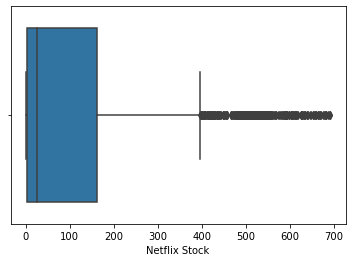

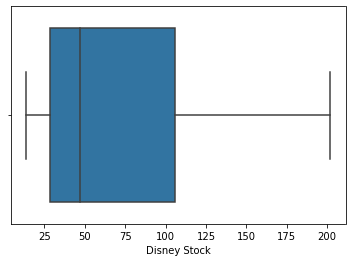

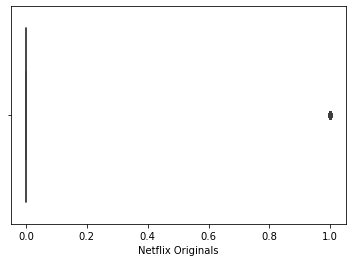

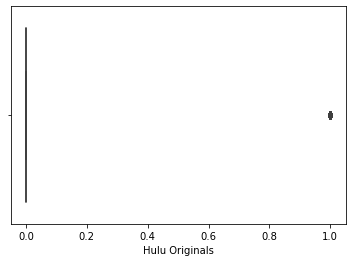

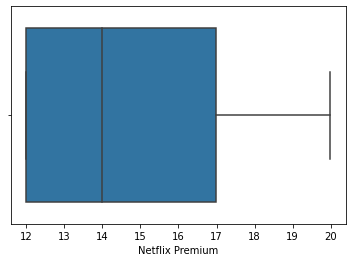

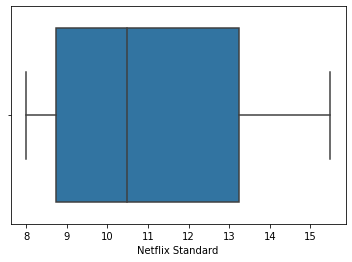

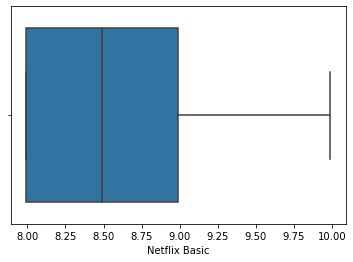

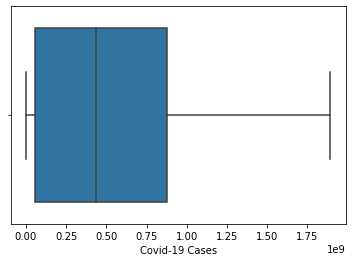

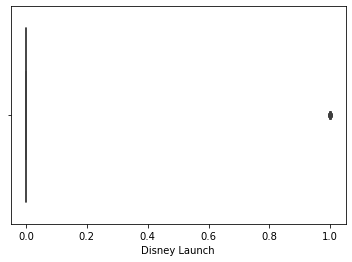

In [47]:
sns.boxplot(x=unifiedDF_updated['Netflix Stock'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Disney Stock'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Originals'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Hulu Originals'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Premium'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Standard'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Basic'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Covid-19 Cases'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Disney Launch'])
plt.show()

In [50]:
#Filling in missing values based on past and future data
unifiedDF_updated[['Disney Stock']] = unifiedDF_updated[['Disney Stock']].fillna(method='ffill')
unifiedDF_updated[['Netflix Stock']] = unifiedDF_updated[['Netflix Stock']].fillna(method='ffill')
unifiedDF_updated[['Netflix Premium','Netflix Standard','Netflix Basic','Covid-19 Cases']] = unifiedDF_updated[['Netflix Premium','Netflix Standard','Netflix Basic','Covid-19 Cases']].fillna(method='ffill')
unifiedDF_updated[['Netflix Premium','Netflix Standard','Netflix Basic']] = unifiedDF_updated[['Netflix Premium','Netflix Standard','Netflix Basic']].fillna(method='bfill')

#Convert NaN of Covid-19 Cases to 0
unifiedDF_updated['Covid-19 Cases'] = unifiedDF_updated['Covid-19 Cases'].replace(np.nan, 0)

In [51]:
#Adding values for Originals and Launch
unifiedDF_updated['Netflix Originals'] = unifiedDF_updated['Netflix Originals'].rolling(len(unifiedDF_updated.index), min_periods=1).sum()
unifiedDF_updated['Hulu Originals'] = unifiedDF_updated['Hulu Originals'].rolling(len(unifiedDF_updated.index), min_periods=1).sum()
unifiedDF_updated['Disney Launch'] = unifiedDF_updated['Disney Launch'].rolling(len(unifiedDF_updated.index), min_periods=1).sum()

unifiedDF_updated.describe(datetime_is_numeric=True, include='all')

,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
count,5652,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5652.000000,5.652000e+03,5652.000000
mean,2013-04-23 13:50:19.108280320,149.529485,76.115927,10982.150920,13.481861,9.879331,8.283171,20135.805379,1.455073e+08,950.703645
min,2002-05-23 00:00:00,0.372857,13.584105,0.000000,11.990000,7.990000,7.990000,0.000000,0.000000e+00,0.000000
25%,2008-01-02 18:00:00,4.221429,30.117846,0.000000,11.990000,7.990000,7.990000,0.000000,0.000000e+00,0.000000
50%,2013-08-01 12:00:00,39.070713,64.775002,0.000000,11.990000,7.990000,7.990000,1435.000000,0.000000e+00,0.000000
75%,2019-01-03 06:00:00,300.044991,111.760002,4300.500000,15.990000,12.990000,8.990000,29440.000000,0.000000e+00,0.000000
max,2022-07-13 00:00:00,691.690002,201.910004,125350.000000,19.990000,15.490000,9.990000,118689.000000,1.891678e+09,11764.000000
std,NaN,192.600585,50.381203,25057.449548,2.464565,2.469779,0.540882,31327.263211,4.126622e+08,2483.924499


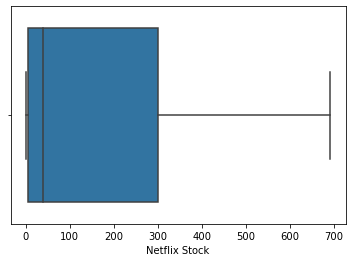

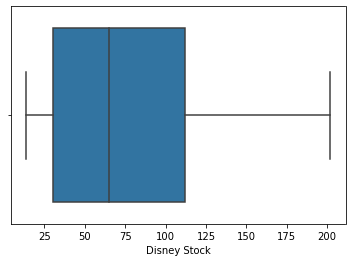

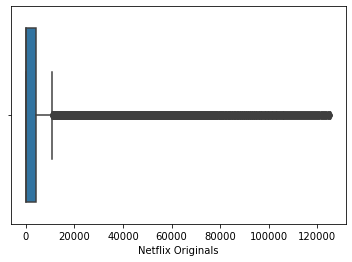

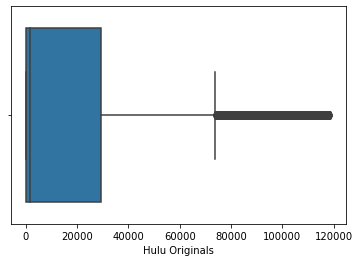

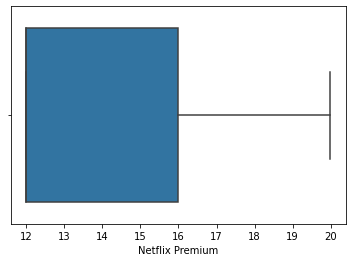

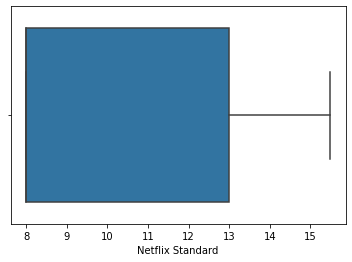

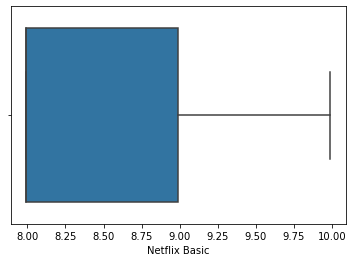

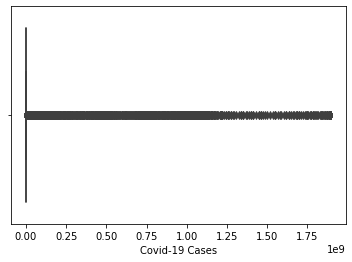

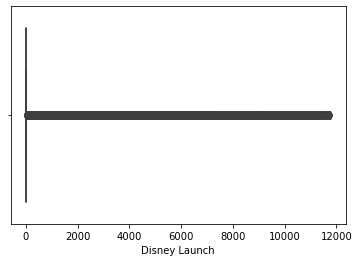

In [52]:
sns.boxplot(x=unifiedDF_updated['Netflix Stock'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Disney Stock'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Originals'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Hulu Originals'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Premium'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Standard'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Netflix Basic'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Covid-19 Cases'])
plt.show()
sns.boxplot(x=unifiedDF_updated['Disney Launch'])
plt.show()

In [53]:
#Saving the dataframe
unifiedDF_updated.to_csv('data/unifiedDF_updated.csv')

#Normalized thr data frame
normalized_df=(unifiedDF_updated-unifiedDF_updated.min())/(unifiedDF_updated.max()-unifiedDF_updated.min())
normalized_df

,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
8123,0.000000,0.001191,0.052697,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,0.000136,0.001211,0.051283,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,0.000680,0.001134,0.051178,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,0.000816,0.001057,0.048611,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8127,0.000952,0.00101,0.049554,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13446,0.999320,0.26993,0.43688,0.992836,1.0,1.0,1.0,0.997068,1.0,0.9949
13447,0.999728,0.255985,0.425092,0.994623,1.0,1.0,1.0,0.997801,1.0,0.996175
13448,0.999864,0.251805,0.42488,0.99641,1.0,1.0,1.0,0.998534,1.0,0.99745
13606,1.000000,0.251805,0.42488,0.998205,1.0,1.0,1.0,0.999267,1.0,0.998725


In [55]:
#Checkcing our DataFrame values
normalized_df.describe(datetime_is_numeric=True, include='all')

,Date,Netflix Stock,Disney Stock,Netflix Originals,Netflix Premium,Netflix Standard,Netflix Basic,Hulu Originals,Covid-19 Cases,Disney Launch
count,5652.000000,5652.000000,5652.000000,5652.0,5652.0,5652.0,5652.0,5652.0,5652.0,5652.0
unique,NaN,4601.000000,4013.000000,2384.0,5.0,7.0,3.0,3296.0,775.0,1170.0
top,NaN,0.870899,0.627454,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,7.000000,7.000000,3269.0,3901.0,2996.0,4236.0,2357.0,4548.0,4483.0
mean,0.542221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.301908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.278786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.555805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.825075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Netflix Stock')

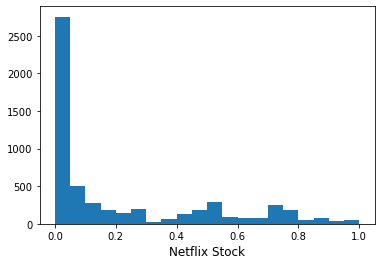

In [56]:
plt.hist(normalized_df['Netflix Stock'], bins = 20)
plt.xlabel('Netflix Stock',fontsize = 12)

Text(0.5, 0, 'Disney Stock')

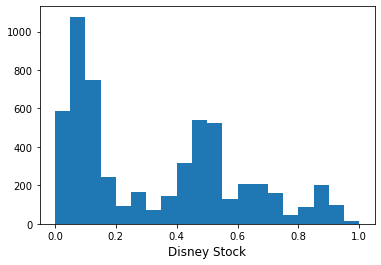

In [57]:
plt.hist(normalized_df['Disney Stock'], bins = 20)
plt.xlabel('Disney Stock',fontsize = 12)

Text(0.5, 0, 'Netflix Premium')

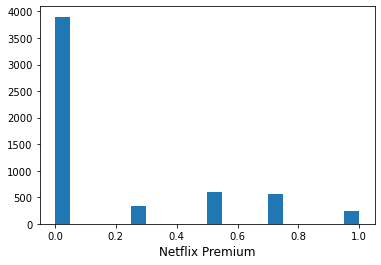

In [58]:
plt.hist(normalized_df['Netflix Premium'], bins = 20)
plt.xlabel('Netflix Premium',fontsize = 12)

Text(0.5, 0, 'Netflix Standard')

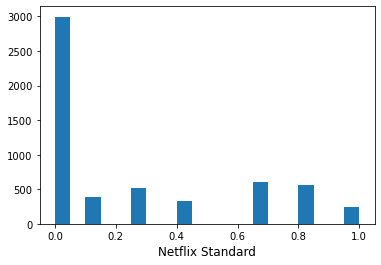

In [59]:
plt.hist(normalized_df['Netflix Standard'], bins = 20)
plt.xlabel('Netflix Standard',fontsize = 12)

Text(0.5, 0, 'Netflix Basic')

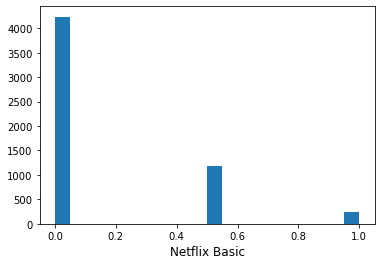

In [60]:
plt.hist(normalized_df['Netflix Basic'], bins = 20)
plt.xlabel('Netflix Basic',fontsize = 12)

Text(0.5, 0, 'Covid-19 Cases')

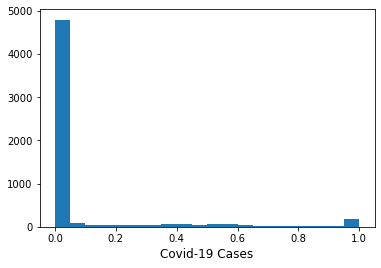

In [61]:
plt.hist(normalized_df['Covid-19 Cases'], bins = 20)
plt.xlabel('Covid-19 Cases',fontsize = 12)

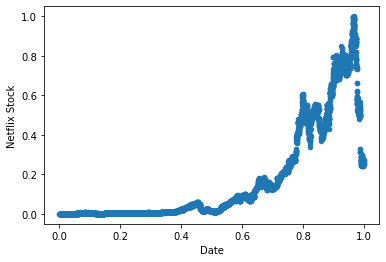

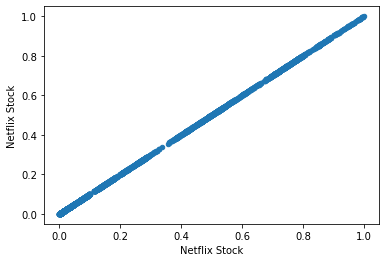

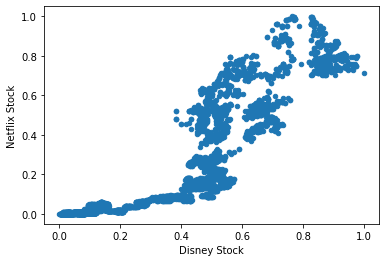

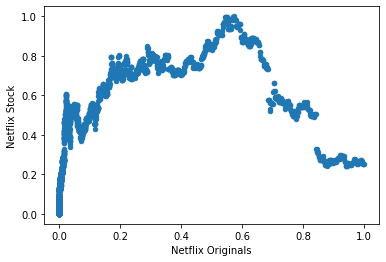

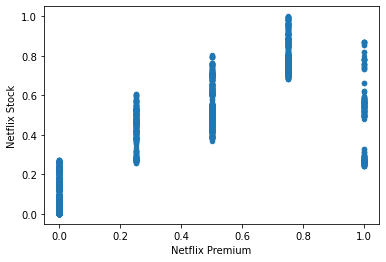

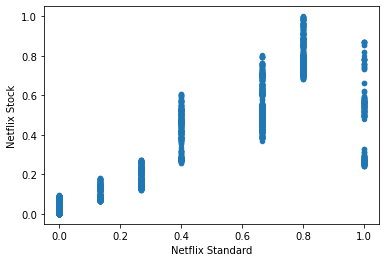

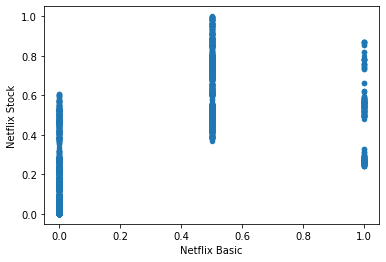

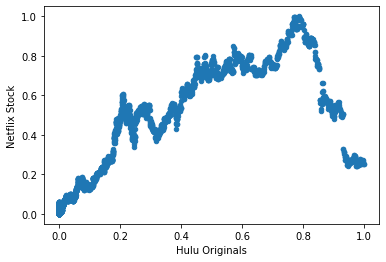

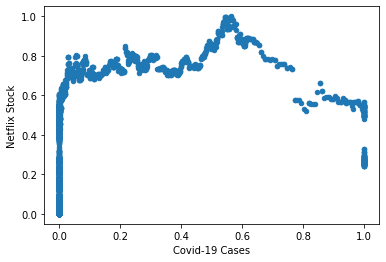

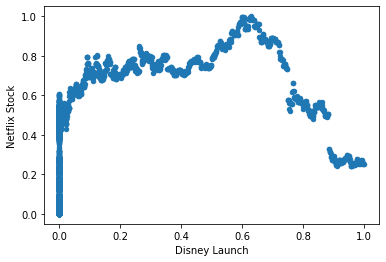

In [62]:
columns=normalized_df.columns
for column in columns:
    normalized_df.plot.scatter(x = column, y = 'Netflix Stock', s = 20);
    plt.xlabel(column)
    plt.ylabel('Netflix Stock')

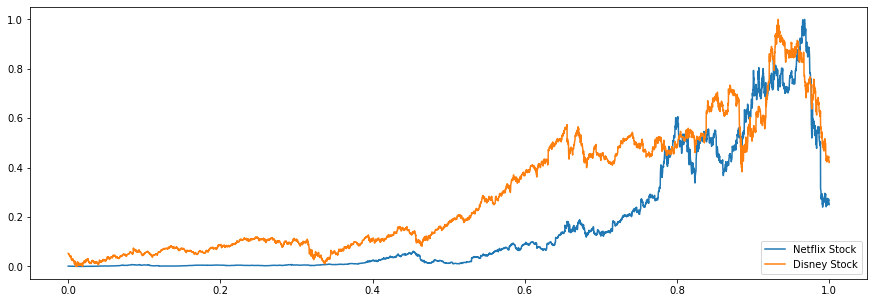

In [63]:
plt.plot(normalized_df['Date'], normalized_df['Netflix Stock'], normalized_df['Date'],normalized_df['Disney Stock'])
plt.gcf().set_size_inches((15, 5))
plt.legend(['Netflix Stock', 'Disney Stock'], loc ="lower right")
plt.show()

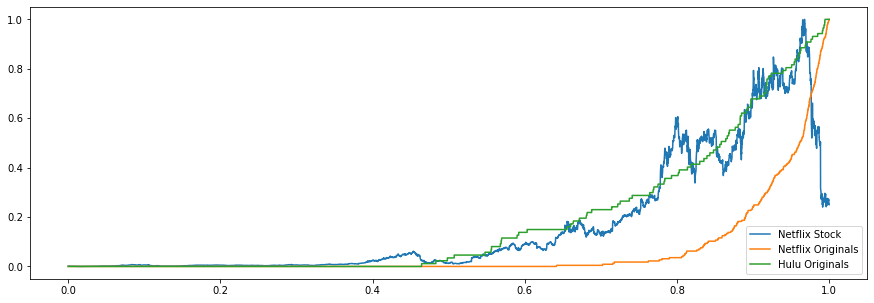

In [29]:
plt.plot(normalized_df['Date'], normalized_df['Netflix Stock'], normalized_df['Date'], normalized_df['Netflix Originals'], normalized_df['Date'], normalized_df['Hulu Originals'])
plt.legend(['Netflix Stock', 'Netflix Originals', 'Hulu Originals'], loc ="lower right")
plt.gcf().set_size_inches((15, 5))
plt.show()

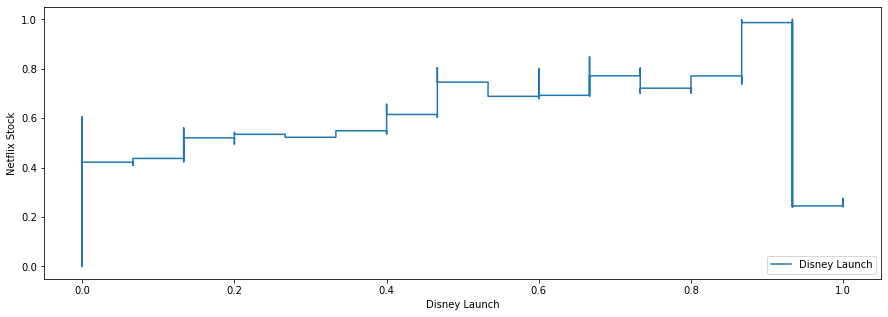

In [31]:
plt.plot(normalized_df['Disney Launch'], normalized_df['Netflix Stock'])
plt.legend(['Disney Launch', 'Netflix Stock'], loc ="lower right")
plt.gcf().set_size_inches((15, 5))
plt.xlabel('Disney Launch')
plt.ylabel('Netflix Stock')
plt.show()

In [32]:
def splitData(df, features, labels, specifed_random_state=42):
    """Split a subset of the dataset, given by the features, into train and test sets."""
    df_predictors = df[features].values
    df_labels = df[labels].values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_predictors, df_labels, random_state=specifed_random_state)
    return XTrain, XTest, yTrain, yTest

In [33]:
def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Perished", "Survived"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

In [34]:

decisionTree = tree.DecisionTreeRegressor(max_depth=10, min_samples_split=25)

features = ['Disney Stock', 'Netflix Originals', 'Netflix Premium', 'Netflix Standard', 
            'Netflix Basic', 'Hulu Originals', 'Covid-19 Cases', 'Disney Launch']

XTrain, XTest, yTrain, yTest = splitData(unifiedDF_updated, features, ["Disney Stock"])
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, features)

NameError: name 'tree' is not defined

In [35]:
#Import the class
from sklearn.tree import DecisionTreeRegressor 
X = unifiedDF_updated[['Disney Stock']] #Two-dimensional (pd DataFrame)
y = unifiedDF_updated['Netflix Stock'] #One-dimensional (pd Series) 
#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=2, random_state=1) #Fit (train) the model
dtr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

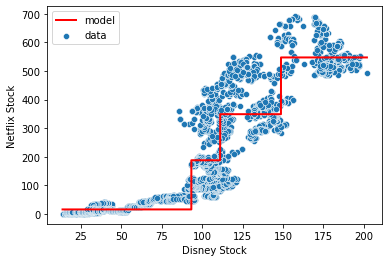

In [36]:
sns.scatterplot(x=unifiedDF_updated['Disney Stock'], y=unifiedDF_updated['Netflix Stock'], label='data') 
plt.plot(unifiedDF_updated['Disney Stock'].sort_values(), dtr1.predict(unifiedDF_updated['Disney Stock'].sort_values().to_frame()), color='red', label='model', linewidth=2) 
plt.legend() 
plt.savefig('model.png')

In [37]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr1, feature_names=['Disney Stock'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree")

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'